Text(0.5, 1.0, 'G6 Sulfur DJF surface air temperature (ts) change (K)')

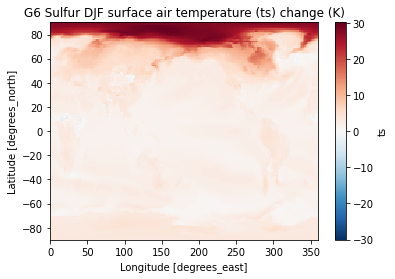

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

ds_solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Amon/ts/gn/files/d20191031/*')
ds_sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Amon/ts/gn/files/d20191113/*')
ds_G1 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/Amon/ts/gn/files/d20190916/*')
ds_585 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/ts/gn/files/d20190507/*')
pi_control = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/ts/gn/files/d20200828/*').isel(time=slice(0,1200))

air_temp = ds_sulfur['ts']
end_temp = air_temp.isel(time=slice(852,972)) #timeslice for the end of the simulation
end_seasonal = (
    end_temp
    .groupby("time.season").mean('time')
    #.mean(season)
    .reindex(season=["DJF", "MAM", "JJA", "SON"])  # Put the values in a useful order
)
#end_seasonal.sel(season='DJF').plot()

start_temp = air_temp.isel(time=slice(1,120)) #timeslice for the start of the simulation
start_seasonal = (
    start_temp
    .groupby("time.season").mean('time')
    #.mean(season)
    .reindex(season=["DJF", "MAM", "JJA", "SON"])  # Put the values in a useful order
)
#start_seasonal.sel(season='DJF').plot()

final_seasonal = end_seasonal - start_seasonal #difference between the two simulations 
final_seasonal.values

final_seasonal.sel(season='DJF').plot()
plt.title('G6 Sulfur DJF surface air temperature (ts) change (K)')




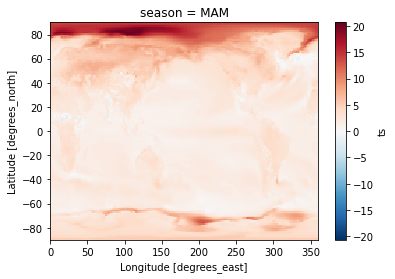

In [10]:
final_seasonal.sel(season='MAM').plot()

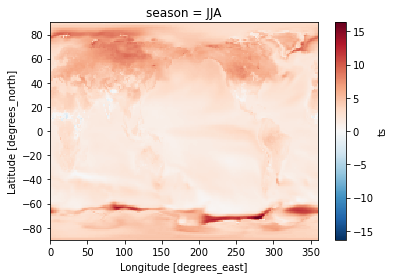

In [11]:
final_seasonal.sel(season='JJA').plot()

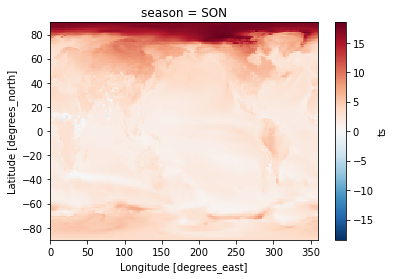

In [12]:
final_seasonal.sel(season='SON').plot()